# **Team 3**: Facilitating Community-Informed Opioid Prescription Guidelines

Charet Bolton (crbolton), Joey Zhou (yizhou6), Manzoor Mirza (mmmirza), Raja Safiullah (rsafiull), Yixi Qiu (yixiq)

***Important Note for Colab***: Before running, please make sure to move this entire project folder from your 'Shared with Me' section of Google Drive to your 'My Drive.'

## **Project Motivation and Background**

The Opioid Crisis was declared in 2017 and its economic burden is estimated at $78.5 billion a year in the U.S. (Florence et al, 2016).<p>

To mitigate the impacts of the opioid crisis, the CDC issued Clinical Practice Guideline for Prescribing Opioids in 2016. This guideline received a lot of negative pushback, with patients and providers indicating that it limited access to opioid therapy and was too restrictive. In response, the CDC has updated its guideline to include things like new evidence-based practices and greater shared decision-making for more individualized treatment (CD, 2022).<p> 

The CDC has opened up public comments on the proposed draft of the 2022 gyuideline from February 4,2022 to April 11, 2022. These comments will illuminate the stories, concerns, and experiences from the patient, provider, and community side to delineate the impact of the change in guidelines. Our insights will support policy makers and decision makers in adjusting the guideline to better reflect the needs and priorities of those impacted and ensure safe and effective treatment for patients nationwide. 


## **Policy Questions of Interest**
Our policy questions will reveal the priorities and preferences of those impacted by the clinical guideline. The answers to the following questions will allow the policymakers responsible for the clinical guideline to supplement and modify the drafted guidelines to make them more effective for all stakeholders.

*   What is the general sentiment towards the guidelines? Negative or positive? Does this differ by topic (i.e. pre- vs. post-treatment)?
*   What entities show concern for the guidelines and what are their demographics? What concerns do people have regarding the drafted 2022 Clinical Practice Guidelines? 



## **Dataset**
### Data Source
We pulled our data from the Regulations.gov API using Python code. The code for webscraping is included as a part of our project's zip file.

### Data Description
At the time of extraction, we had 4,500 comments. All comments are public submissions. These comments contain a range of stakeholders such as pharmacy technicians, patients and their families, physicians, organizations combating opioid addiction, and pharmaceutical companies and associations. Our dataset currently has the unique identification of the comment as one attribute, the number of duplicates for the comment, and the text of the comment itself. The comments are unstructured as they are plain text and do not have a uniform format or structure. 



## **Analysis Methods and Justification**
*Clustering using GMM and KMeans*: this analysis will help us identify patterns surrounding which which sentiments may be associated with certain clusters and the comparative size of the cluster (to understand majority/minority sentiment) <p> 
*Text frequency analysis*: through analyzing demographic information such as length of opioid usage, age distribution of users, and most prominent entities, we can investigate those concerned about the guidelines to predict concerns by demographic as well as identify potential stakeholders to consult in further developing the guideline<p>
*LDA*: topic modeling facilitates identification of potential themes across comments and concerns that individuals may have

## **Data Cleaning and Exploration**

In [1]:
import numpy as np
import csv
from collections import Counter
import spacy
import matplotlib.pyplot as plt
import re
!pip install wordcloud
from wordcloud import WordCloud

In [2]:
opioid_data = []
# run the below line to access csv file
with open('Opioid Comment Data from API.csv', 'r',encoding = 'utf-8') as f:
    # with open('Opioid Comment Data from API.csv', 'r',encoding = 'utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        opioid_data.append(row[3])
    

After loading all the data we interested in, we chose lemmanization on all tokens to find their basic representation. To avoid including meaningless tokens, we used SpaCy to remove stopwords, punctuation and spaces and also only focus words consisting of alphabetic letters to ensure words tidy. In addition, we manually added some additional words like "opioid","basically",etc., which occurred a lot but with limited material influence on frequency analysis.

In [3]:
from collections import Counter

nlp = spacy.load('en_core_web_sm')
# an empty list to store all comments after parsing through nlp
parsed_comments_nlp = []

# looping through each comment in opioid_data
for comment in opioid_data:
    # storing the nlp output in the empty list
    parsed_comments_nlp.append(nlp(comment))

# counter dictionary, with the key as the word and the value as the frequency count
histogram_original = Counter() # original tokens
histogram_filtered = Counter() # lemmatized, alphabetic tokens
    
# looping through each token in the parsed_comment object
for parsed_comment in parsed_comments_nlp:
    for token in parsed_comment:
        # adding original tokens without any processing, to the dictionary
        histogram_original[token] +=1
        # lemmatizing the words i.e. finding their basic representation 
        lemma = token.lemma_
        # filtering out lemmas which are default stop words, punctuation and spaces 
        if not (nlp.vocab[lemma].is_stop or token.pos_ == 'PUNCT' or token.pos_ == 'SPACE'):
            # keeping only those lemmas which contain alphabetic letters 
            if re.match('[a-zA-Z]+$', lemma):
                histogram_filtered[lemma] += 1
    
# removing additional stopwords which were seen in 'histogram_filtered' and might not add value to our analysis
manual_stopwords = ['opioid', 'dr', 'tell', 'try', 'people', 'opiate', 'non', 'basically', 'fall']

# list comprehension to filter selected/ manually chosen stop words
histogram_filtered_twice = Counter({lemma: count
                                    for lemma, count in histogram_filtered.items()
                                    if lemma not in manual_stopwords})

Following are some of the top ranking (Top 50 most commonly occuring) Lemmas, in our corpus of interest.

In [4]:
# the output 'sorted_lemma_count_pairs' is a list of tuples
sorted_lemma_count_pairs = histogram_filtered_twice.most_common()
    
# printing the top 50 items from the list of tuples i.e. sorted_lemma_count_pairs
print('{:<10s}{:<15s}{:<10s}'.format('Rank', 'Lemma', 'Count'))

for rank, value in enumerate(sorted_lemma_count_pairs[:50]):
    print('{:<10s}{:<15s}{:<10}'.format(str(rank + 1), value[0], value[1])) 

Rank      Lemma          Count     
1         pain           21769     
2         patient        8742      
3         doctor         6257      
4         medication     5687      
5         chronic        5237      
6         guideline      5209      
7         life           4916      
8         year           4857      
9         need           4534      
10        CDC            4189      
11        use            3302      
12        drug           3274      
13        like           3182      
14        prescribe      3057      
15        help           3012      
16        treat          2974      
17        day            2887      
18        time           2784      
19        suffer         2690      
20        work           2652      
21        dose           2299      
22        care           2241      
23        know           2191      
24        cause          2180      
25        treatment      2137      
26        live           2130      
27        RLS            205

We found 'pain', 'patient', 'doctor', 'medication' to be the top 4 lemmas. That suggest a possible set of commonly mentioned concerns in the comments. 'Pain' being twice as commonly mentioned compared to the second lemma, suggests an increased focus on how this could be a concern that either needs to be mitigated or has been actively addressed by the new guidelines. It is reasonable which Opioid is mostly used to contol pain. Patients and Doctors are the people that mainly use Opioid. We can also see "guidline" and "CDC" appears frequently which indicate what the contents are about, as well as "chronic", "life", "years", "need", which shows some sentiment people have and some concerns that contains in peole's comments.

Text(0, 0.5, 'Raw count')

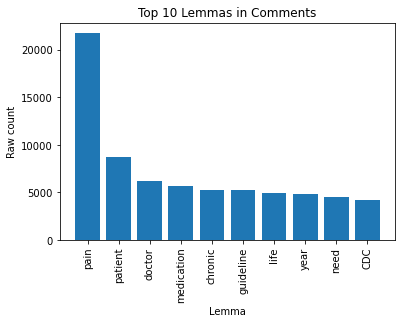

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt

# plottting the raw count of the top 10 most frequently appearing lemmas in the data
num_top_lemmas_to_plot = 10
top_lemmas = [lemma for lemma, count in sorted_lemma_count_pairs[:num_top_lemmas_to_plot]]
top_lemma_counts = [count for lemma, count in sorted_lemma_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_lemma_counts)
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.title('Top %d Lemmas in Comments' % num_top_lemmas_to_plot)
plt.xlabel('Lemma')
plt.ylabel('Raw count')

In [6]:
# creating a counter dictionary to store the named entity and their frequncy
entity_counter = Counter()
# creating a counter dictionary to store the named entity label and their frequncy
label_counter = Counter()

# parsing through each entity and storing its orthographic representation, label
for parsed_comment in parsed_comments_nlp:
    for entity in parsed_comment.ents:
        if re.match('[a-zA-Z]+$', entity.orth_.lower()):
            entity_counter[entity.orth_.lower()] +=1
            label_counter[entity.label_] +=1

# sorting based on the most common entities in the label_counter
sorted_entity_count_pairs = entity_counter.most_common()

# sorting based on the most common labels in the label_counter
sorted_label_count_pairs = label_counter.most_common()

We also visualized the raw counts distribution of entity labels, and found that ORG was by far the most commonly occuring entity label. Looking into the organizations can help us understand the audience and the stakeholders involved.

Text(0, 0.5, 'Raw Count')

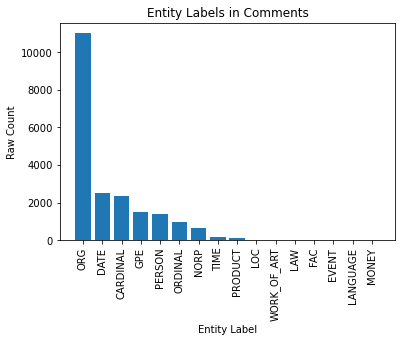

In [7]:
# extracting the counts for each label
labels_counts = [count for label, count in sorted_label_count_pairs]
# extracting the labels
labels = [label for label, count in sorted_label_count_pairs]

# plotting the entity labels and the frequency of labels
# plt.figure(figsize=(10,6))
plt.bar(range(len(labels_counts)), labels_counts)
plt.xticks(range(len(labels)), labels, rotation = 90)
plt.title('Entity Labels in Comments')
plt.xlabel('Entity Label')
plt.ylabel('Raw Count')

In [8]:
entity_counter_PRODUCT = Counter()

for comment in parsed_comments_nlp:
    # for each article, storing an entity with PRODUCT and GPE label in the relevant list below 
    PRODUCT = []
    
    for entity in comment.ents:
        if re.match('[a-zA-Z ]+$', entity.orth_.lower()):

            # appending the lemma representation of each entity to the list
            if entity.label_ == 'PRODUCT':
                PRODUCT.append(entity.orth_.lower())
        
    # converting the list PRODUCT and GPE to a set to remove duplicates of entity.lemma_ since we are only checking for 
    # presence of an entity in a comment and not its frequency of occurrences
    
    # updating the count for a each lemma if the list PRODUCT/GPE has a single occurrence of the relevant entity
    entity_counter_PRODUCT.update(set(PRODUCT))

# getting the most common entities in the entity_counter
sorted_entity_count_PRODUCT = entity_counter_PRODUCT.most_common(10)


#printing the top 10 items from the list of tuples i.e. (entity, count)
#print ('\nTop 10 Most Frequently Occuring Entities with PRODUCT Label')
#for entity, count in sorted_entity_count_PRODUCT:
#print(entity, ":", count)

In terms of the Top 10 entities with Product Label, we found 'opioid prescribing guidelines' to be by far the most commonly occurring entity in the comments. Followed by 'pain', suggesting that a possible relationship between the two across all the comments. Where the former could be a way to address the latter, given 'pain' appears to be a common concern raised in the comments.

Text(0, 0.5, 'Raw Count')

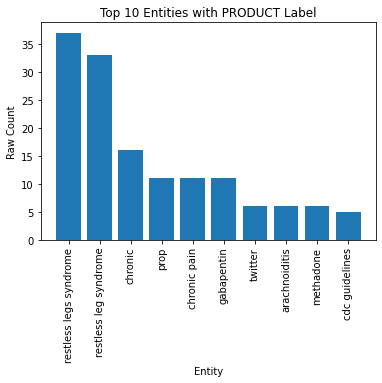

In [9]:
# plotting the top entities within labels of interest i.e. PRODUCT 

#set up plotting area
# plt.figure(figsize=(10,6))

top_entities_within_PRODUCT = [entity for entity, count in sorted_entity_count_PRODUCT]
top_entity_counts_within_PRODUCT = [count for entity, count in sorted_entity_count_PRODUCT]

# plotting the top 10 entities and their frequency with PRODUCT LABEL
plt.bar(range(len(top_entity_counts_within_PRODUCT)), top_entity_counts_within_PRODUCT)
plt.xticks(range(len(top_entities_within_PRODUCT)), top_entities_within_PRODUCT, rotation = 90)
plt.title('Top %d Entities with PRODUCT Label' % 10)
plt.xlabel('Entity')
plt.ylabel('Raw Count')

## **Data Analysis**

### *Question 1*: Sentiment Analysis<p><p>
What is the general sentiment towards the guidelines? Negative or positive? Does this differ by topic (i.e. pre- vs. post-treatment)?


#### Clustering Analysis



To better understand the trends/patterns inherent to the corpus, we decided to perform unsupervised learning technique of clustering. To perform that we need to convert the comments and their text in a feature-vector representations. 

This was achieved through TF-IDF vectorization technique, where by we were able to recieve a set of 1602 words of interest that would serve as features for clustering. These 1602 words were noted across all 4502 comments in the corpus. 

TF-IDF representation also is a form of normalization, that allows us to normalize the features in a manner that makes them comparable. This was required for the unsupervised learning tasks that were performed on the TF-IDF Matrix. 

In [10]:
# Unlike CountVectorizer, TfidfVectorizer not only focuses on term freq but also their relative importance
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer does tokenization and can remove terms that occur too frequently, not frequently enough, or are stop words
tf_idf_vectorizer = TfidfVectorizer(max_df = 0.8, # remove words that appear in more than 80% of the emails
                                min_df = 50, # remove words that do not appear in at least 50 emails
                                stop_words = 'english') 

# transform gives you a feature vector representation, where rows are emails (samples) and columns are the words (features) 
# and each cell in the output represents the 'weighted' frequency of a particular word in a particular document  
X = tf_idf_vectorizer.fit_transform(opioid_data)
X = X.toarray()

# (number of comments/documents, number of words)
X.shape

(4502, 1602)

We started by performing the Gaussian Mixture Modelling on high dimensional data. This was done to minimize the loss of information, so as to allow all features of interest to contribute to the formation of the clusters. 

GMM also offers a softer approach to deciding the number of clusters parameter. Calinski Harabasz Score was used for hyper-parameter tuning, while checking for a range of possible values for K (with K being the variable for number of clusters). The results were interesting, since we were able to note that the optimal number of clusters were 2. (k=2) using the CH index. 

This gives us a good insight into the possible clusters that exist in the data, since we expected a demarcation between the patients and the rest (with the rest including physicians, pharmacies, pharmaceuticals and other stakeholders).

In [11]:
# Using GMM on high-dimensional data for clustering, automatically selecting the number of clusters using CH index

# *************************************CAUTION: TAKES 15-20 MINUTES TO RUN*********************************************
from sklearn.metrics import calinski_harabasz_score
from sklearn.mixture import GaussianMixture

best_score = -np.inf
best_k = None
best_model = None
best_cluster_assignments = None

# hyperparameter tuning to select k for GMM clustering
for k in range(2, 6):
    candidate_gmm = GaussianMixture(n_components=k, n_init = 10, random_state=0)
    candidate_gmm.fit(X) 
    cluster_assignments = candidate_gmm.predict(X)
    score = calinski_harabasz_score(X, cluster_assignments)
    
    print('k =', k, 'has CH index', score)
     
    if score > best_score:
        best_score = score
        best_k = k
        best_model = candidate_gmm
        best_cluster_assignments = cluster_assignments
    
print('Best k according to CH index:', best_k)

k = 2 has CH index 89.65532072734997
k = 3 has CH index 81.59986055970556
k = 4 has CH index 75.77849050020247
k = 5 has CH index 84.65996901747639
Best k according to CH index: 2


We noted that the first cluster (cluster 0) included twice as many comments, compared to the second cluster (Cluster 1). This is interesting to note, since we expected one of the clusters to capture the comments made patients who we imagine would be more in quantity compared to the rest of the stakeholders.

In [12]:
# printing the number of comments assigned to each cluster
for cluster in range(2): 
    print ('Number of comments assigned to cluster ' + str(cluster) + ' is: ', (best_cluster_assignments == cluster).sum())

Number of comments assigned to cluster 0 is:  1158
Number of comments assigned to cluster 1 is:  3344


Next, we used TSNE for dimensionality reduction to allow for ease in visualization. The reduced number of dimensions, were 2 that could be plotted through a scatter plot on a 2 dimensional graph. 

The results were not that encouraging, since no clear demarcation or a distinction of value could be achieved through the clusters formed in the visualization. Suggesting that a different approach would be required to form the required clusters.

(-67.54996452331542, 61.77975425720215, -46.97184162139892, 47.95581607818603)

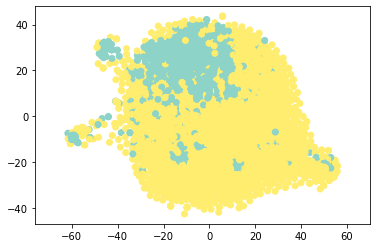

In [13]:
# Using tSNE (perplexity val chosen from iterative search) to reduce dimensions to 2D for viz of cluster assignments

from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, perplexity=40, random_state=0, init='pca')
opioid_data_tsne2d = tsne_model.fit_transform(X)

# plotting based on GMM cluster assignments in the 2D-tSNE space
plt.scatter(opioid_data_tsne2d[:, 0],
            opioid_data_tsne2d[:, 1],
            c=best_cluster_assignments, cmap='Set3')

plt.axis('equal')

The second approach was to perform K-means clustering. Here againg the CH index was used for hyperparameter tuning which gave us K=2 after checking across a range of possible values for K.

We used the best possible k (k=2), to run clustering thereby forming two clusters of the comments.  This clustering was also done at the high dimensional data as well, so as to minimize loss of information. 


In [14]:
# Final Approach: Using K-means on high-dimensional data, automatically selecting the number of clusters using CH index

from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans

best_score = -np.inf
best_k = None
best_model = None
best_cluster_assignments = None

# hyperparameter tuning to select k for Kmeans clustering
for k in range(2, 6):
    candidate_kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    candidate_kmeans.fit(X) 
    cluster_assignments = candidate_kmeans.predict(X)
    score = calinski_harabasz_score(X, cluster_assignments)
    
    print('k =', k, 'has CH index', score)
     
    if score > best_score:
        best_score = score
        best_k = k
        best_model = candidate_kmeans
        best_cluster_assignments = cluster_assignments
    
print('Best k according to CH index:', best_k)

k = 2 has CH index 127.48477471319534
k = 3 has CH index 113.92048800628866
k = 4 has CH index 105.02695520092166
k = 5 has CH index 97.71001743817261
Best k according to CH index: 2


The two clusters that were formed represented a vast majority being in the same cluster, with a minority being part of the other cluster. This sheds some more light on the possible distribution of comments from patients, and other stakeholders that we will hope to explore further while characterizing clusters.

In [15]:
# printing the number of comments assigned to each cluster
for cluster in range(2): 
    print ('Number of comments assigned to cluster ' + str(cluster) + ' is: ', (best_cluster_assignments == cluster).sum())

Number of comments assigned to cluster 0 is:  4222
Number of comments assigned to cluster 1 is:  280


After clustering at high dimensional data, the dimensionality was reduced to 2 dimensions using Principal Component Analysis. The First and the Second Component analysis were used to plot the graph, to visualize the clusters which appeared to give promising results. Two clusters could not be noted with considerable clarity and some expected overlap between the two clusters since we expect some commonality across the clusters. For say, patients' comments and pharmaceuticals' comments could be predominantly in different clusters but share similar concerns in some cases/comments.

(-0.26503189041453357,
 0.9038327732773529,
 -0.44456990117162853,
 0.666581175752591)

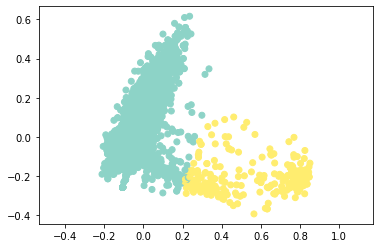

In [16]:
# Using PCA to reduce dimensions to 2D for viz of cluster assignments
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
opioid_data_pca2d = pca.fit_transform(X)

# plotting based on kmeans cluster assignments in the 2D-PCA space
plt.scatter(opioid_data_pca2d[:, 0],
            opioid_data_pca2d[:, 1],
            c=best_cluster_assignments, cmap='Set3')

plt.axis('equal')

#### Characterization of Clusters

To better gauge the sentiments of the individuals expressed in the comments, we decided on characterizing the clusters based on some key words that could represent satisfaction or dissatisfaction of the stakeholders/commentors. 

In [17]:
# using a function to characterize the clusters using a two sets of comparison words
def plot_words_by_cluster(X, predicted, n_clusters, first_indices, second_indices, label_1, label_2):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Calculate mean TF-IDF features for each cluster
    mean_tfidf_first = []
    mean_tfidf_second = []
    for first in first_indices:
        mean_tfidf_first.append([])
    for second in second_indices:
        mean_tfidf_second.append([])
    
    for i in range(n_clusters):
        for j, first_idx in enumerate(first_indices):
            mean_tfidf_first[j].append(X[predicted==i, first_idx].mean())
        for j, second_idx in enumerate(second_indices):
            mean_tfidf_second[j].append(X[predicted==i, second_idx].mean())
    
    # Generate plot
    fig, ax = plt.subplots()

    ind = np.arange(n_clusters)    # the x locations for the groups
    width = 0.10         # the width of the bars

    # Plot first comparison group bars
    for i, val in enumerate(mean_tfidf_first):
        first_bar = ax.bar(ind - (len(mean_tfidf_first)-i-1)*width, val, width, color='r', bottom=0)

    # Plot second comparison group bars
    for i, val in enumerate(mean_tfidf_second):
        second_bar = ax.bar(ind + (len(mean_tfidf_second)-i)*width, val, width,
                color='y', bottom=0)

    ax.set_title('Mean TF-IDF Features by Cluster')
    ax.set_xticks(ind + width / 2)
    xticklabels = []
    for i in range(n_clusters):
        xticklabels.append('Cluster ' + str(i) + '\n(n=' + str((predicted==i).sum()) + ')')
    ax.set_xticklabels(xticklabels)

    ax.legend((first_bar[0], second_bar[0]), (label_1, label_2))
    ax.autoscale_view()
    ax.set_ylabel('Mean TF-IDF')
    plt.show()

The first characterization was done on the basis of opposition and support words. This was done to understand how the different clusters felt about the new guidelines.

The support words that were used for the exercise: 'control', 'concerned', 'supporting'. These were chosen because they represent how a stakeholder would possibly feel if revisions were required in the earlier guidelines that were addressed in the new edition. Along with the presence of the word 'suppporting' that made it easier to identify comments in support of the new guidelines.

The opposing words used for the exercise included: 'illegal', 'criminal', 'rescind'. These were chosen as they possibly suggest strong opinions against the new guidelines. And capture antagonism or disappointment towards the new edition.

In the results we can see that the mean TF-IDF is higher for the supporting words in Cluster 0. This is the cluster that includes the vast majority of the comments. In the much smaller Cluster 1, we not that the oppossing words mean TF-IDF is consderably higher compared to supporting words. This essentially suggests that while the vast majority appears to be in support of the new guidelines there is nevertheless still a minority that feel strongly against the new guidelines - represented by the smaller cluster of the two.

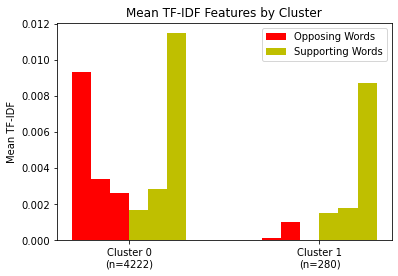

In [18]:
# characterizing the clusters based on opposition and support

vocab = list(tf_idf_vectorizer.vocabulary_.keys())

# storing the indices for opposing words
opposing_words = ['illegal', 'criminal', 'rescind']
opposing_indices = [tf_idf_vectorizer.vocabulary_[word] for word in opposing_words]

# storing the indices for supporting words
supporting_words = ['control', 'concerned', 'supporting']
supporting_indices = [tf_idf_vectorizer.vocabulary_[word] for word in supporting_words]

# for each of the three clusters, plotting the average TF_IDF for each of the six words
plot_words_by_cluster(X, best_cluster_assignments, 2, opposing_indices, supporting_indices,
                     'Opposing Words', 'Supporting Words')

The second characterization was done on the basis of pre-treatment and post-treatment words. The words used here are based on the aspects CDC used to design these guidelines. 

The pre-treatment words used were: 'start', 'visit', 'short'. While the post-treatment words used were: 'follow', 'potential', 'harms'. 

The results suggest that the mean TF-IDF is much higher for the post-treatment words in Cluster 0 (the bigger cluster). This suggests that the vast majority is on average more concerned about the opioid treatment follow-up and chronic use. This is critical to better understanding the audience, and understanding their pain points before the next edition of the guidelines can be released.

While at the same time the pre-treatment words appear to have higher mean TF-IDF compared to post-treatment words in cluster 1 (smaller cluster). This suggests that there is a minority that is comparatively more concerned about short-term use and acute treatment. 

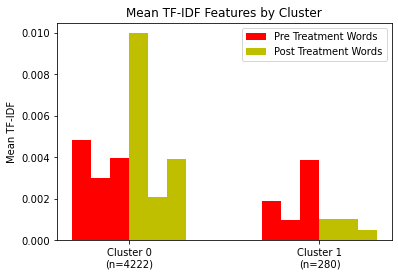

In [19]:
# characterizing the clusters based on aspects CDC used to design guidelines e.g. assisting clinicians with 'dose' selection

# storing the indices for  words
pre_treatment_words = ['start', 'visit', 'short']
pre_treatment_indices = [tf_idf_vectorizer.vocabulary_[word] for word in pre_treatment_words]

# storing the indices for supporting words
post_treatment_words = ['follow', 'potential', 'harm']
post_treatment_indices = [tf_idf_vectorizer.vocabulary_[word] for word in post_treatment_words]

# for each of the three clusters, plotting the average TF_IDF for each of the six words
plot_words_by_cluster(X, best_cluster_assignments, 2,pre_treatment_indices, post_treatment_indices, 
                     'Pre Treatment Words','Post Treatment Words')

### *Question 2*: Concern Identification and Stakeholder Analysis<p><p>

What entities show concern for the guidelines and what are their demographics? What concerns do people have regarding the drafted 2022 Clinical Practice Guidelines? 

#### Demographic Analysis

The distribution of ages that we were able to extract from the comments, suggested that 50-70 years old were the most commonly occcuring groups of individuals within the comments whose ages we had access to (or were mentioned so could be extracted). This is of considerable importance, since we note that this age group appears to be active in commenting on the guidelines. They appear to be a subset of the entire intended audience that feels strongly about the guidelines, since they feel the most impacted by it. These considerations could be crucial for future editions of the guidelines.

In [20]:
# using approximate analysis to check what do the ages of people commenting look like 
age = Counter()
age_terms = ['%d years old', '%d yr old', '%d yrs old', '%d-year-old']
years = [20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90]

for comment in opioid_data:
    for check in age_terms:
        for yr in years:
            combined = check % yr
            if combined in comment:
                age[combined] += 1 

age_distribution = Counter()

for yr in years:
    for key, value in age.items():
        if str(yr) in key:
            age_distribution[str(yr) + ' years'] += value 

Text(0, 0.5, 'Count')

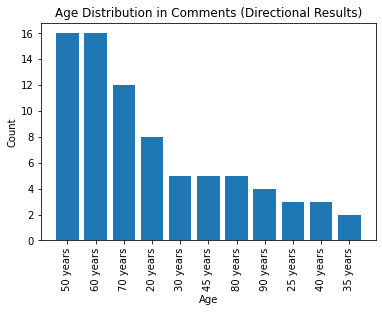

In [21]:
# plotting the ages uncovered through text analysis (results are directional)
sorted_age_count_pairs = age_distribution.most_common()

ages = [age for age, count in sorted_age_count_pairs]
age_counts = [count for age, count in sorted_age_count_pairs]

# plotting the top 30 entities and their frequency
plt.bar(range(len(age_counts)), age_counts)
plt.xticks(range(len(ages)), ages, rotation = 90)
plt.title('Age Distribution in Comments (Directional Results)')
plt.xlabel('Age')
plt.ylabel('Count')


The below code approximately extracts how long someone has been using a drug by looking at potential associated words, such as 'for the past _ years.' From this analysis we can get a better sense of the chrnic distribution. 

In [22]:
# using approximate analysis to check how long individuals have been using pain medication/opioids 
usage = Counter()
usage_terms = ['%d year', '%d yr ago', '%d yr', '%d-year', '%d years', '%d yrs', 'for %d yrs', 
               'for the %d years', 'for the past %d years', 'over the %d years',
               'over the last %d years']
years = [5, 10, 15, 20, 25, 30]

for comment in opioid_data:
    for check in usage_terms:
        for yr in years:
            combined = check % yr
            if combined in comment:
                usage[combined] += 1 

usage_distribution = Counter()

for yr in years:
    for key, value in usage.items():
        if str(yr) in key:
            usage_distribution[str(yr) + ' years'] += value         

Text(0, 0.5, 'Proportion of Comments w/Usage')

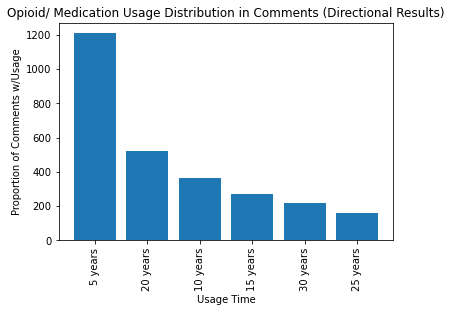

In [23]:
# plotting the usages uncovered through text analysis (results are directional)
sorted_usage_count_pairs = usage_distribution.most_common()

usages = [usage for usage, count in sorted_usage_count_pairs]
total_count = sum([count for usage, count in sorted_usage_count_pairs])
usage_count = [count for usage, count in sorted_usage_count_pairs]

# plotting the top 30 entities and their frequency
plt.bar(range(len(usage_count)), usage_count)
plt.xticks(range(len(usages)), usages, rotation = 90)
plt.title('Opioid/ Medication Usage Distribution in Comments (Directional Results)')
plt.xlabel('Usage Time')
plt.ylabel('Proportion of Comments w/Usage')

In [24]:
print('Number of comments mentioning acute: ', sum([1 for comment in opioid_data if 'acute' in comment]))
print('Number of comments mentioning chronic: ', sum([1 for comment in opioid_data if 'chronic' in comment]))

Number of comments mentioning acute:  260
Number of comments mentioning chronic:  2327


From the above chart, we can see that there are a number of people mention using opioids for about five years, but we also see about 1/3 of the comments that mention usage indicate usage of 20 years or more. <p>

By looking at the prevalence of acute versus chronic, we see a lot more mention of chronic than acute usage or conditions in general. This confirms our analysis from the previous section that more people are concerned about long-term usage. This can indicate the importance of balancing the guideline to consider the sustainability of the guideline for chronic users.

#### Stakeholder Analysis

When we visualized the raw counts distribtution of the top 10 entities in the comments/corpus, we noted 'cdc' to be the most commonly occuring one with 'dea' and 'fda' also in the mix. This made sense, since we had such a high comparative raw count of ORG entity label, as noted in the previous distribution. 

Another interesting element to be noted was 'rls' being the second most commonly occuring entity in the comments. Restless Leg Syndrome - also referred to as rls - is a condition or a disorder for which opioids are commonly prescribed or used. Since opioids can relieve the patients of rls symptoms.

Text(0, 0.5, 'Raw Count')

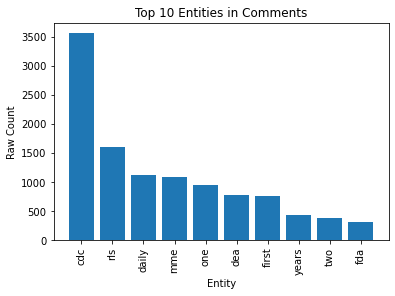

In [25]:
#set up plotting area

# plottting the raw count of the top 10 most frequently appearing entities in the data
num_top_entities_to_plot = 10

# extracting the top 10 entities 
top_entities = [entity for entity, count in sorted_entity_count_pairs[:num_top_entities_to_plot]]
# extracting the counts for each entity
top_entity_counts = [count for entity, count in sorted_entity_count_pairs[:num_top_entities_to_plot]]

# plotting the top 10 entities and their frequency
plt.bar(range(len(top_entity_counts)), top_entity_counts)
plt.xticks(range(len(top_entities)), top_entities, rotation = 90)
plt.title('Top %d Entities in Comments' % num_top_entities_to_plot)
plt.xlabel('Entity')
plt.ylabel('Raw Count')

#### LDA
We did LDA to identify potential themes and concerns across the comments. 

##### Detailed Analysis for Choice of Number of Topics
Prior to conducting topic modeling, we determine an optimal number of topics to use. We looked at multiple random states to see whether a certain number of topics had a higher average coherence and higher average number of unique words across different random states.<p>
For our TF-IDF vectorizer for the LDA, we added additional stopwords that weren't captured by TFIDF. Some of these words included gibberish, such as 'rsquo','quot,' and 'br'. Other words were related to text formatting (i.e. 'span,' '30px,' and '39') or to the comments themselves (i.e. 'attached' and 'file'). These words retracted from our analysis due to their overprevalence in some topics and their irrelevance for concern identification so we removed them using custom stopwords.<p>

In [35]:
from sklearn.feature_extraction import text
from sklearn.decomposition import LatentDirichletAllocation

custom_stopwords = text.ENGLISH_STOP_WORDS.union(['rsquo', 'https', '39', '30px', 'br', 'attached', 'quot', 'file', 'span'])

LDA_vectorizer = TfidfVectorizer(stop_words= custom_stopwords, min_df=50, max_df=0.8)

X = LDA_vectorizer.fit_transform(opioid_data).toarray()

The following three cells compute average coherence and average number of unique words for a given number of topics. 

In [36]:
def prob_see_word1_given_see_word2(word1, word2, vectorizer, eps=0.1):
    word1_column_idx = vectorizer.vocabulary_[word1]
    word2_column_idx = vectorizer.vocabulary_[word2]
    documents_with_word1 = (X[:, word1_column_idx].flatten() > 0)
    documents_with_word2 = (X[:, word2_column_idx].flatten() > 0)
    documents_with_both_word1_and_word2 = documents_with_word1 * documents_with_word2
    return np.log2((documents_with_both_word1_and_word2.sum() + eps) / documents_with_word2.sum())

In [37]:
# computes the average number of unique words for each topic
def compute_average_num_unique_words(topic_word_distributions, num_top_words, vectorizer, verbose=True):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    average_number_of_unique_top_words = 0
    for topic_idx1 in range(num_topics):
        sort_indices1 = np.argsort(topic_word_distributions[topic_idx1])[::-1]
        num_unique_top_words = 0
        for top_word_idx1 in sort_indices1[:num_top_words]:
            word1 = vocab[top_word_idx1]
            break_ = False
            for topic_idx2 in range(num_topics):
                if topic_idx1 != topic_idx2:
                    sort_indices2 = np.argsort(topic_word_distributions[topic_idx2])[::-1]
                    for top_word_idx2 in sort_indices2[:num_top_words]:
                        word2 = vocab[top_word_idx2]
                        if word1 == word2:
                            break_ = True
                            break
                    if break_:
                        break
            else:
                num_unique_top_words += 1

        average_number_of_unique_top_words += num_unique_top_words
    average_number_of_unique_top_words /= num_topics
    
    return average_number_of_unique_top_words

In [38]:
# computes average coherence for each topic
def compute_average_coherence(topic_word_distributions, num_top_words, vectorizer, verbose=True):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    average_coherence = 0
    for topic_idx in range(num_topics):       
        sort_indices = np.argsort(topic_word_distributions[topic_idx])[::-1]
        coherence = 0.
        for top_word_idx1 in sort_indices[:num_top_words]:
            word1 = vocab[top_word_idx1]
            for top_word_idx2 in sort_indices[:num_top_words]:
                word2 = vocab[top_word_idx2]
                if top_word_idx1 != top_word_idx2:
                    coherence += prob_see_word1_given_see_word2(word1, word2, vectorizer, 0.1)
        
        average_coherence += coherence
    average_coherence /= num_topics

    return average_coherence

This function would plot side-by-side plots of average number of unique words and average coherence for a given number of k-values, average coherences and number of unique words. The random state would be passed in as well.

In [39]:
def plot_avg_coherence_and_unique_words(k_values, avg_coherences, avg_num_unique_words, rand_state):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))
    
    fig.suptitle('Results for Random State '+ str(rand_state))
    ax1.plot(k_values, avg_coherences)
    ax1.set(xlabel = 'Number of topics', ylabel ='Average coherence')
    
    ax2.plot(k_values, avg_num_unique_words)
    ax2.set(xlabel='Number of topics', ylabel='Average number of unique words')
    # source: https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

For each of the four random states, the following code would print the average coherence and unique words for k values from 2 to 10. It uses the LDA_vectorizer defined above. We looked at more random states in our analysis, but looked at three here to minimize runtime.

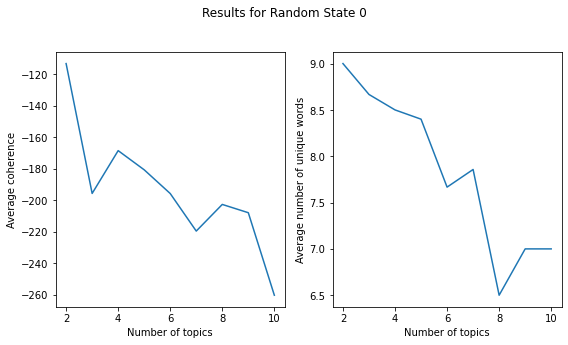

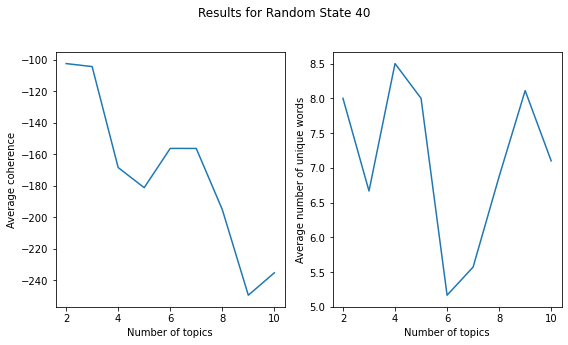

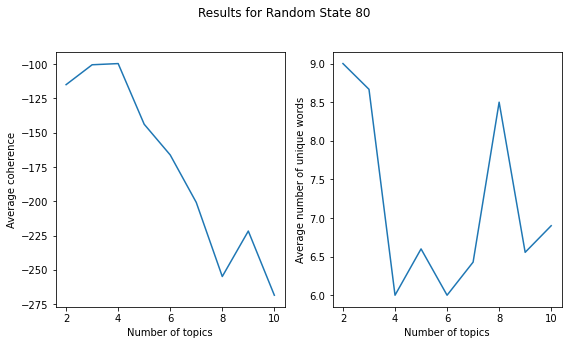

In [33]:
rand_states = [0,40, 80]
num_top_words = 10

for rand_state in rand_states:
    k_values = range(2, 11)
    avg_coherences = []
    avg_num_unique_words = []

    for k in k_values:
        lda_candidate = LatentDirichletAllocation(n_components=k, random_state=rand_state)
        lda_candidate.fit(X)
        topic_word_distributions = np.array([row / row.sum() for row in lda_candidate.components_])

        avg_coherences.append(compute_average_coherence(topic_word_distributions, num_top_words, LDA_vectorizer, False))
        avg_num_unique_words.append(compute_average_num_unique_words(topic_word_distributions, num_top_words, LDA_vectorizer, False))
    plot_avg_coherence_and_unique_words(k_values, avg_coherences, avg_num_unique_words, rand_state)

From it we see that four topics has at least one of the highest average coherences and/or one of the highest average number of unique words across all of the different random states. 

##### Topic Modeling
We chose four topics as it had the highest average number of unique words and the second-highest average coherence (detailed analysis above). In our presentation, we also included two topics from 9 topics at random state 0, but did not include it here to allow for conciseness and highlight the most actionable implications.<p>

For each topic, we include a potential topic name.

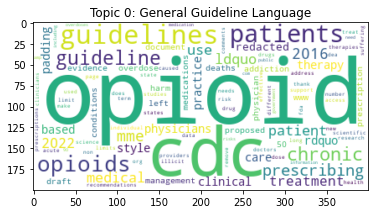

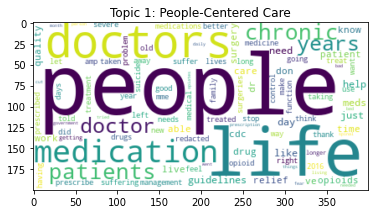

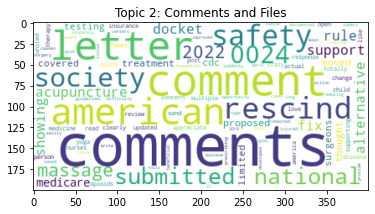

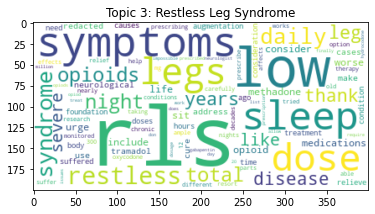

In [40]:
num_topics = 4
num_max_word_cloud_words = 100
vocab = LDA_vectorizer.get_feature_names()

lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(X)
topic_word_distributions = np.array([row / row.sum() for row in lda.components_])
num_topics = len(topic_word_distributions)
topic_labels = ['General Guideline Language', 'People-Centered Care',
                'Comments and Files','Restless Leg Syndrome']
for topic_idx in range(num_topics):
    wc = WordCloud(background_color = 'white', max_words=num_max_word_cloud_words)
    wc.generate_from_frequencies(dict(zip(vocab, topic_word_distributions[topic_idx])))
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Topic ' +str(topic_idx) + ': ' + topic_labels[topic_idx])

From the above figures, we can pull out certain topics to identify potential concerns. 

For topic 2, we see a lot of mentions of people, such as 'doctors', 'patient', and 'life.' This makes sense as there was a lot of backlash from the 2016 guidelines due to a lack of individualization. Ensuring the guideline provides human-centered care is therefor an important concern to individuals.

For topic 4, we see a lot of words such as restless, rls (aka restless leg syndrome), and symptoms. Restless leg syndrome performs better to opioid therapy than to other conventional treatments, so these individuals are likely concerned about having sufficient access to opioid therapy.

## **Policy Implications and Conclusion**

Our analysis provides a number of key insights that will be helpful for decisionmakers as they continue to develop and update the guidelines.


**Insights for Question 1**<p>
*Clustering Analysis*: The two clusters in our audience indicate the importance of proper preparation and concerns surrounding chronic use and treatment. Therefore, this could be an important point that the guideline should express. As seen in clustering, most people support the guidelines. This indicates relatively favorable acceptance of the new guideline by those who commented, which means the decisionmaker will likely not have to make major revisions to the guideline due to major concerns.<p>

**Insights for Question 2**<p>
*Demographic Analysis*: If we use those who commented as a close proxy for those concerned about the guidelines, we can predict concerns. By seeing that many of the commenters were older, they may be more likely to suffer from conditions such as rheumatoid arthritis, restless leg syndrome, and other painful conditions that are relieved by opioid therapy. Therefore, addressing concerns about sustainable and effective use and/or alternatives for long-term conditions is important to address in the guideline.

*Stakeholder Analysis*: From our stakeholder analysis, we see agencies such as the Drug Enforcement Agency, RLS Foundation, and Food and Drug Administration come up within the top ten entities across comments. This highlights the interdisciplinary nature to the guideline and highlights potential individuals that the decisionmakers can consult when further developing the guideline.<p>

*Topic Modeling*: The concerns identified through topic modeling can help decisionmakers make sure the 2022 guidelines address the mentioned concerns. The main concern is balancing priorities. From topic modeling, we saw concern surrounding RLS. The guideline should thus ensure there is a balance between generalized procedures and effective treatments for more specialized and rare conditions. In addition, seeing a human-centric topic, there may be concerns on the individualization of treatment. Therefore, the decisionmaker should ensure there is sufficient allowance of freedom embedded into the guidelines, by introducing some avenues of freedom such as a clearer procedure for patient and physician self-determination for treament. <p> 

**These insights facilitate community-informed guidelines to improve treatment and provide better care.**


**References**<p>
Centers for Disease Control and Prevention. Proposed 2022 CDC Clinical Practice Guideline for Prescribing Opioids. Regulations.gov. 2022. https://www.regulations.gov/document/CDC-2022-0024-0001 <p>
Florence CS, Zhou C, Luo F, Xu L. The Economic Burden of Prescription Opioid Overdose, Abuse, and Dependence in the United States, 2013. *Med Care*. 2016;54(10):901-906. doi:10.1097/MLR.0000000000000625.

